# Project – Customer Churn

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

---
## 1. Data Manipulation:

#### ● Extract the 5th column and store it in ‘customer_5’

In [29]:
df['customer_5'] = df.iloc[:, 4]
df['customer_5']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: customer_5, Length: 7043, dtype: object

#### ● Extract the 15th column and store it in ‘customer_15’

In [30]:
df['customer_15'] = df.iloc[:, 14]
df['customer_15']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: customer_15, Length: 7043, dtype: object

#### ● Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

In [18]:
senior_male_electronic = df[(df['gender']=='Male')&(df['SeniorCitizen']==1)&(df['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5,customer_15
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,No,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,No,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No,Yes,Yes
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No,No,Yes
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,Month-to-month,No,Electronic check,74.70,74.7,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No,No,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes,No,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes,No,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes,No,No


#### ● Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’

In [20]:
customer_total_tenure = df[(df['tenure']>70)|(df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5,customer_15
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,No,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No,No,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,No,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,No,Yes
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No,No,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,No,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,No,No internet service
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Yes,Yes


#### ● Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’

In [26]:
two_mail_yes = df[(df['Contract']=='Two year')&(df['PaymentMethod']=='Mailed check')&(df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5,customer_15
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes,No,No internet service
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes,Yes,No internet service
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes,Yes,No


#### ● Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’

In [27]:
customer_333 = df.sample(333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5,customer_15
5775,4057-FKCZK,Male,0,Yes,Yes,58,Yes,Yes,Fiber optic,No,...,Yes,No,Two year,No,Bank transfer (automatic),82.50,4828.05,No,Yes,No
3934,1729-VLAZJ,Female,0,No,Yes,10,No,No phone service,DSL,Yes,...,No,No,One year,No,Mailed check,40.25,411.45,No,Yes,No
4744,6139-ZZRBQ,Male,1,No,No,64,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.05,1198.05,No,No,No internet service
915,6513-EECDB,Male,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,73.55,73.55,Yes,No,No
6080,9526-BIHHD,Male,0,No,No,1,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.70,29.7,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4705,5760-FXFVO,Male,0,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,Month-to-month,Yes,Electronic check,78.95,494.95,No,No,No
6839,4078-SAYYN,Female,0,No,No,11,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,100.75,1129.75,Yes,No,Yes
4724,5073-RZGBK,Female,0,Yes,Yes,50,Yes,Yes,DSL,Yes,...,No,Yes,One year,Yes,Bank transfer (automatic),80.05,4042.2,No,Yes,Yes
5024,8774-GSBUN,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.40,1797.1,No,No,No internet service


#### ● Get the count of different levels from the ‘Churn’ column

In [28]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

---
## 2. Data Visualization:

#### ● Build a bar-plot for the ’InternetService’ column:
- a. Set x-axis label to ‘Categories of Internet Service’
- b. Set y-axis label to ‘Count of Categories’
- c. Set the title of plot to be ‘Distribution of Internet Service’
- d. Set the color of the bars to be ‘orange’

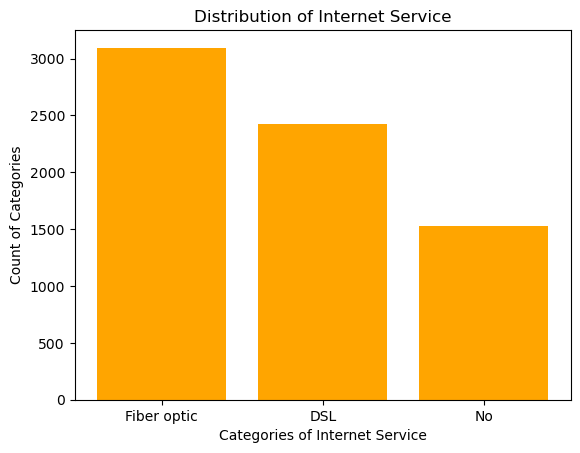

In [49]:
x = df['InternetService'].value_counts().keys().tolist()
y = df['InternetService'].value_counts().tolist()
plt.bar(x, y, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

#### ● Build a histogram for the ‘tenure’ column:
- a. Set the number of bins to be 30
- b. Set the color of the bins to be ‘green’
- c. Assign the title ‘Distribution of tenure’

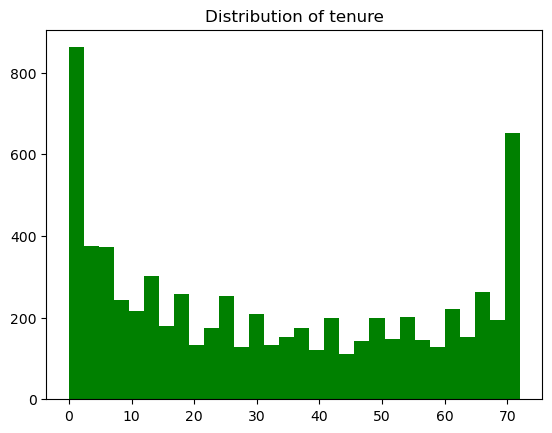

In [51]:
x = df['tenure']
plt.hist(x, bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

#### ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
- a. Assign the points a color of ‘brown’
- b. Set the x-axis label to ‘Tenure of customer’
- c. Set the y-axis label to ‘Monthly Charges of customer’
- d. Set the title to ‘Tenure vs Monthly Charges’


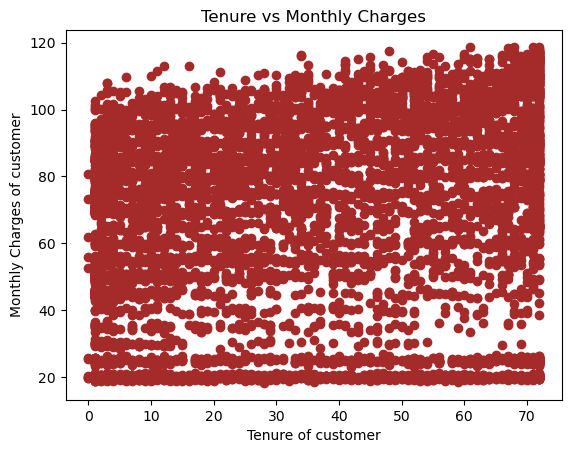

In [57]:
x = df['tenure']
y = df['MonthlyCharges']
plt.scatter(x,y, color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

- e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
- f. ‘Contract’ on the x-axis.

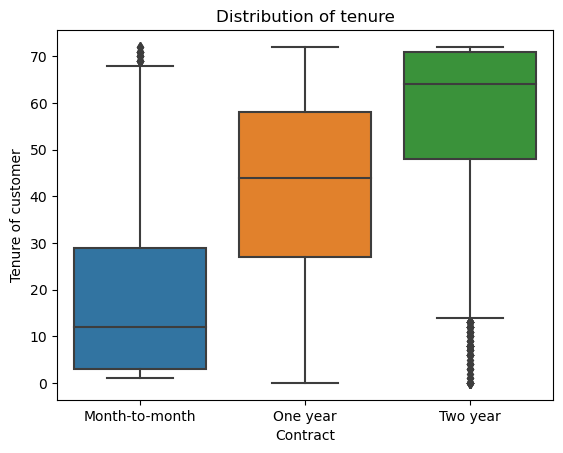

In [62]:
sns.boxplot(data=df, x="Contract", y="tenure")
plt.xlabel('Contract')
plt.ylabel('Tenure of customer')
plt.title('Distribution of tenure')
plt.show()

---
## 3. Linear Regression:

#### ● Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
- a. Divide the dataset into train and test sets in 70:30 ratio.
- b. Build the model on train set and predict the values on test set
- c. After predicting the values, find the root mean square error
- d. Find out the error in prediction & store the result in ‘error’
- e. Find the root mean square error

In [156]:
X = np.array(df['MonthlyCharges']).reshape(-1,1)
y = np.array(df['tenure']).reshape(-1,1)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=2)

In [158]:
lin_reg_model = LinearRegression()

In [159]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [160]:
y_predict = lin_reg_model.predict(X_test)

In [161]:
mse = mean_squared_error(y_test, y_predict)
mse

549.7531488719915

In [162]:
error = (np.sqrt(mse))
error

23.446815324729954

---
## 4. Logistic Regression:

#### ● Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
- a. Divide the dataset in 65:35 ratio
- b. Build the model on train set and predict the values on test set
- c. Build the confusion matrix and get the accuracy score

In [88]:
X = np.array(df['MonthlyCharges']).reshape(-1,1)
y = np.array(df['Churn']).reshape(-1,1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=2)

In [105]:
log_reg_model = LogisticRegression()

In [106]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_predict = log_reg_model.predict(X_test)

In [108]:
confusion_matrix(y_test, y_predict)

array([[1832,    0],
       [ 634,    0]], dtype=int64)

In [109]:
accuracy_score(y_test, y_predict)

0.7429034874290349

- d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
- e. Divide the dataset in 80:20 ratio
- f. Build the model on train set and predict the values on test set
- g. Build the confusion matrix and get the accuracy score

In [126]:
X = np.array(df[['tenure', 'MonthlyCharges']])
y = np.array(df['Churn'])

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=2)

In [128]:
log_reg_model = LogisticRegression()

In [129]:
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [130]:
y_predict = log_reg_model.predict(X_test)

In [131]:
confusion_matrix(y_test, y_predict)

array([[964,  97],
       [197, 151]], dtype=int64)

In [132]:
accuracy_score(y_test, y_predict)

0.7913413768630234

---
## 5. Decision Tree:

#### ● Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
- a. Divide the dataset in 80:20 ratio
- b. Build the model on train set and predict the values on test set
- c. Build the confusion matrix and calculate the accuracy

In [138]:
X = np.array(df['tenure']).reshape(-1, 1)
y = np.array(df['Churn']).reshape(-1, 1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=2)

In [140]:
dec_tree = DecisionTreeClassifier()

In [141]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
y_pred = dec_tree.predict(X_test)

In [143]:
confusion_matrix(y_test,y_pred)

array([[965,  96],
       [240, 108]], dtype=int64)

In [144]:
accuracy_score(y_pred,y_test)

0.7615330021291696

---
## 6. Random Forest:

#### ● Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’:
- a. Divide the dataset in 70:30 ratio
- b. Build the model on train set and predict the values on test set
- c. Build the confusion matrix and calculate the accuracy

In [146]:
X = np.array(df[['tenure', 'MonthlyCharges']])
y = np.array(df['Churn']).reshape(-1, 1)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [151]:
rand_forest = RandomForestClassifier()

In [152]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier()

In [153]:
y_pred = rand_forest.predict(X_test)

In [154]:
confusion_matrix(y_test,y_pred)

array([[1360,  209],
       [ 298,  246]], dtype=int64)

In [155]:
accuracy_score(y_pred,y_test)

0.7600567912920019